## Laboratorio 5: Spatial filtering and edge detection

- Elaborado por: Oscar Omar Martínez Lujano 
- Matrícula: 352228  
- Carrera: ITR  
- Fecha: 2019-03-05  


### Introduction




### Objectives


In this lab, you will learn about a fundamental topic in the field of image processing and image enhancement, this is spatial filtering.

### Requerimientos del Laboratorio

EL software, hardware y herramientas de programación requeridas en este lab son:
  
    - Raspberry Pi with WiFi connection capabilities
    - Jupyter Notebook
    - Python >= 3.5.2
    - OpenCV 3.2
    - Git
    - GitHub account
    - Markdown editor (recommended: ReText 5.3.1)


### Procedimiento

The information below has been taken from Digital Image Processing, 3rd edition, authors: Rafael C. Gonzalez and Richard E. Woods. Refer to this link for further details on this book. Multiple copies of this reference can be found at UDEM library.

#### Fundamentals of spatial filtering

Spatial filtering can be denoted by the expression:

<img src="Figs/0.gif" width="200" alt="Combined Image" />


where f(x,y) is the input image, g(x,y) is the output image, and T is an operator on f defined over a neighborhood of point (x,y). The figure below shows the basic implementation of the above equation on a single image. The point (x,y) shown is an arbitrary location in the image, and the small region shown containing the point is a neighborhood of (x,y). Typically, the neighborhood is rectangular, centred on (x,y), and much smaller in size than the image.



<img src="Figs/1.png" width="400" alt="Combined Image" />

The process of spatial filtering consists of moving the origin of the neighborhood from pixel to pixel and applying an operator T to the pixels in the neighborhood to yield the output at that location. Hence, for any specific location (x,y), the value of the output image g(x,y) at those coordinates is equal to the result of applying T to the neighborhood with the origin at (x,y) in f(x,y). If the operation performed on the image pixels is linear, then the filter is called a linear spatial filter; otherwise, the filter is nonlinear.

<img src="Figs/2.png" width="400" alt="Combined Image" />

The figure above illustrates the mechanics of linear spatial filtering using a 3x3 kernel or filter. At any point (x,y) in the image, the response g(x,y) of the filter is the sum of products of the filter coefficients and the image pixels encompassed by the filter:

<img src="Figs/0.0.gif" width="600" alt="Combined Image" />

observe that the centre coefficient of the filter, w(0,0), aligns with the pixel at location (x,y). For a mask/filter of size m x n, we assume that m = 2a +1 and n = 2b+1, where a and b are two positive integers. This means that we will focus on filters of odd size, with the smallest being of size 3x3.

#### Spatial correlation and convolution

There are two closely related concepts that must be clearly undestood when performing linear spatial filtering. One is CORRELATION and the other is CONVOLUTION. Correlation is the process of moving a filter mask over the image and computing the sum of products at each location, exactly as explained in the section above. The mechanics of convoution are the same, except that that the filter is first rotated by 180 deg. The best way to explain the difference between the two concepts is by example. The figuew below shows a 1-D function, f, and a filter w. (b) shows the starting position to perform correlation. The first aspect to note is that there are parts of the function that do not overlap. The solution to this problem is to pad f with enough 0s on either side to allow each pixel in w to visit every pixel in f. If the filter is of size m, we need m-1 0s on either side of f. (c) shows a properly padded function. The first value of correlation is the sum of products of f and w for the initial position shown in (c) - the sum of products is 0 -. This corresponds to a displacemente x=0. To obtain the second value of correlation, we shift w one pixel location to the right -a displacement of x=1- and compute the sum of products. The result, again, is 0. In fact, the first nonzero result is when x=3, in which case the 8 in w overlaps the 1 in f and the result of correlation is 8. Proceeding in this manner, we obtain the full correlation result in (g). Note that it took 12 values of x to fully slide w past f so that each pixel in w visited every pixel in f. Often, we like to work with correlation arrays that are the same size as f, in which case we crop the full correlation to the size of the original function as shown in (h).


<img src="Figs/3.png" width="600" alt="Combined Image" />

There are two important points to note from the discussion in the preceding paragraph. First, correlation is a function of displacement of the filter. This is, the first value of correlation corresponds to zero displacement of the filter, the second corresponds to one unit displacement, and so on. The second thing to notice is that correlating a filter w with a function that contains all 0s and a single 1 yields a result that is a copy of w, but rotated by 180deg. We call a function that contains a single 1 with the rest being 0s a discrete unit impulse.

The concept of convolution is a cornerstone of linear system theory. A fundamental property of convolution is that convolving a function with a unit impulse yields a copy of the function at the location of the impulse. Therefore, if we pre-rotate the filter and perform the same sliding sum of products operation, we should be able to obtain the same result. The convolution process is shown in the figure below.

The concepts of 2D image correlation and convolution can be easy understood from the figure below. For a filter of size m x n, we pad the image with a minimum of m-1 rows of 0s at the top and bottom and n-1 columns of 0s on the left and right. In this case, m and n are equal to 3, so we pad f with two rows of 0s above and below and two columns of 0s to the left and right, as shown in (b). (c) shows the initial position of the filter mask for performing correlation. (d) shows shows the full correlation result. (e) shows the corresponding cropped result. Note again that the result is rotated by 180deg. For the convolution process, we first pre-rotate the mask as before and repeat the sliding sum of products just explained. From (f) thorugh (h), we can see the result. You see again that convolution of a function with an impulse copies the function at the location of the impulse. It should be clear that if the filter mask is symmetric, correlation and convolution yields the same result. If instead of containing a single 1, image f had contained a region identically equal to w, the value of the correlation function (after normalising) would have been maximum when w was centred on that region of f. Thus, correlation can be used also to find matches between images.

<img src="Figs/4.png" width="600" alt="Combined Image" />

### a. Libraries

The following libraries are used in the code of this lab.

- ```cv2```: Implementa una gran variedad de algorítmos de procesamiento de imágenes y visión computacional.
- ```numpy:``` Crea y manipula listas, análisis numérico, etc.
- `matplotlib.pyplot:` Produce publicaciones con figuras de calidad en una variedad de formatos de copia impresa y entornos interactivos en todas las plataformas.

In [2]:
# importa librerías estandar
import numpy as numpy
import cv2
import matplotlib.pyplot as plt

### b. Smoothing Spatial Filters

In OpenCV, there exists a method that can be used for 2D image convolution. That method is the `cv2.filter2D()`. In order to better understand the correlation and convolution process, we will write a Python code that runs the correlation and convolution using the function f and the filter w used in the above image. Copy, understand and run the code below and verify that the correlation and convolution results are equal to those obtained in the image above.

# CHANGEEEEEE THIIIIIIIIIIIS    
- `numpy.zeros_like(a, dtype=None, order='K', subok=True)`
    - Return an array of zeros with the same shape and type as a given array.
    - a:array_like - The shape and data-type of a define these same attributes of the returned array.
    - dtype:data-type (optional) - Overrides the data type of the result. 
    - order:{‘C’, ‘F’, ‘A’, or ‘K’} (optional) - Overrides the memory layout of the result. ‘C’ means C-order, ‘F’ means F-order, ‘A’ means ‘F’ if a is Fortran contiguous, ‘C’ otherwise. ‘K’ means match the layout of a as closely as possible.
    - subok:bool (optional) - If True, then the newly created array will use the sub-class type of ‘a’, otherwise it will be a base-class array. Defaults to True.
    - **returns** - ndarray - array of zero with the same shame and type as a.
    
- `matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)`
- `matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)[source]`
    - Get or set the current tick locations and labels of the x-axis.
    - ticks:array_like - a list of positions at which ticks should be placed. You can pass an empty list to disable xticks.
    - labels:array_like (optional) - a list of explicit labels to place at the given locs.
    - **returns**: locs - an array of label locations
    - **returns**: labels - a list of text objects


Información obtenida de:
- https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=sobel#cv2.Sobel
- https://www.numpy.org/devdocs/user/basics.types.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

In [4]:
"""
	convolve-f-with-w.py

	add a description of your code here

	author: add your fullname
	date created: add this info
	universidad de monterrey
"""

# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# define function `f`
f = np.array([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],
	          [0, 0, 1, 0, 0], [0, 0, 0, 0, 0],
	          [0, 0, 0, 0, 0]], np.float32)

# define a 5x5 kernel
kernel = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], np.float32)

# compute correlation
correlation = cv2.filter2D(f, -1, kernel)

# re-rotate the kernel `w` by 180 deg using cv2.flip()
kernel_rotated = cv2.flip(kernel, -1)

# conpute convolution
convolution = cv2.filter2D(f, -1, kernel_rotated)

# display correlation values
print('\nCorrelation:\n', correlation)

# display convolution values
print('\nConvolution:\n', convolution)



Correlation:
 [[ 0.  0.  0.  0.  0.]
 [ 0.  9.  8.  7.  0.]
 [ 0.  6.  5.  4.  0.]
 [ 0.  3.  2.  1.  0.]
 [ 0.  0.  0.  0.  0.]]

Convolution:
 [[ 0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  0.]
 [ 0.  4.  5.  6.  0.]
 [ 0.  7.  8.  9.  0.]
 [ 0.  0.  0.  0.  0.]]


It is important to notice that the kernel was pre-rotated by 180deg, using the method `cv2.flip()`, before performing the convolution. Thus, the default operation executed by `cv2.filter2D()` is correlation, unless the mask is rotated by 180deg as we did; in that case, the operation would involve convolution.

Now that we know the theory behind correlation and convolution, we will now convolve the following 5x5 kernel:

<img src="Figs/0.0.0.gif" width="200" alt="Combined Image" />

with the image 

<img src="Figs/cavalo-motorizado.jpg" width="500" alt="Combined Image" />

notice that also in this code, the kernel was pre-rotated previous to the convolution process. This averaging filters are known as low pass filters. The idea behind smoothing filter is straighforward. By replacing the value of every pixel in an image by the average of the intensity levels in the neighborhood defined by the mask filter, this process results in an image with reduced sharp transitions in intensities. Because random noise typically consists of sharp transitions in intensity levels, the most obvious application of smoothing is noise reduction. Nevertheless, edges (which almost always are desirables features of an image) also are characterised by sharp intensity transitions, so averaging filters have the undesirable side effect that they blur edges. In such situation, an alternative approach would be using the Bilateral filter, which is also used for noise removal while keeping edges sharp.



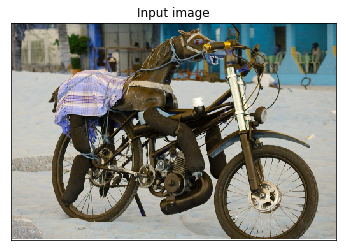

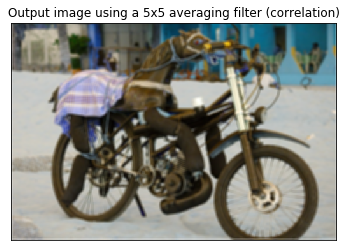

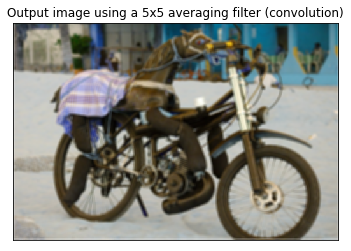

In [3]:
"""
	convolve-image-with-kernel.py

	add a description of your code here

	author: add your fullname
	date created: add this info
	universidad de monterrey
"""

# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# read image
img_name = 'Figs/cavalo-motorizado.jpg'
img = cv2.imread(img_name)

# verify that image `img` exist
if img is None:
	print('ERROR: image ', img_name, 'could not be read')
	exit()

# define a 5x5 kernel
kernel = np.ones((5,5), np.float32)/25
dst_correlation = cv2.filter2D(img, -1, kernel)

# rotate kernel
kernel_rotated = cv2.flip(kernel, -1)
dst_convolution = cv2.filter2D(img, -1, kernel_rotated)

# plot input and convolved images
plt.figure(1)
plt.imshow(img)
plt.title('Input image')
plt.xticks([])
plt.yticks([])

plt.figure(2)
plt.imshow(dst_correlation)
plt.title('Output image using a 5x5 averaging filter (correlation)')
plt.xticks([])
plt.yticks([])

plt.figure(3)
plt.imshow(dst_convolution)
plt.title('Output image using a 5x5 averaging filter (convolution)')
plt.xticks([])
plt.yticks([])

plt.show()

- TO COMPLETE THIS SECTION...

    - Describe the input/output arguments of the method `cv2.flip()`.
    - Describe the input/output arguments of the method `cv2.filter2D()`.
    - What would be the output image if you convolved the input image with a 1x1 dimension kernel?
    - Explain the output images when running the correlation and convolution steps using a kernel with the following sizes:
        - 13 x 13
        - 21 x 21
        - 31 x 31
    - What would be the effect of convolving an input image with the following kernel, which is known as the weighted average filter:
    <img src="Figs/0.0.0.0.gif" width="200" alt="Combined Image" />




###  c. Blur

An alternative approach for performing the 2D spatial filtering is that of `cv2.blur()`. This method blurs an image using the normalised box filter and using the kernel:
    <img src="Figs/0.0.0.0.0.gif" width="400" alt="Combined Image" />
    
The code below makes use of the method `cv2.blur()` for spatial filtering. Copy, understand and run it using multiple sizes of the kernel K and report the output images.

# CHANGEEEEEE THIIIIIIIIIIIS    
- `numpy.zeros_like(a, dtype=None, order='K', subok=True)`
    - Return an array of zeros with the same shape and type as a given array.
    - a:array_like - The shape and data-type of a define these same attributes of the returned array.
    - dtype:data-type (optional) - Overrides the data type of the result. 
    - order:{‘C’, ‘F’, ‘A’, or ‘K’} (optional) - Overrides the memory layout of the result. ‘C’ means C-order, ‘F’ means F-order, ‘A’ means ‘F’ if a is Fortran contiguous, ‘C’ otherwise. ‘K’ means match the layout of a as closely as possible.
    - subok:bool (optional) - If True, then the newly created array will use the sub-class type of ‘a’, otherwise it will be a base-class array. Defaults to True.
    - **returns** - ndarray - array of zero with the same shame and type as a.
    
- `matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)`
- `matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)[source]`
    - Get or set the current tick locations and labels of the x-axis.
    - ticks:array_like - a list of positions at which ticks should be placed. You can pass an empty list to disable xticks.
    - labels:array_like (optional) - a list of explicit labels to place at the given locs.
    - **returns**: locs - an array of label locations
    - **returns**: labels - a list of text objects


Información obtenida de:
- https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=sobel#cv2.Sobel
- https://www.numpy.org/devdocs/user/basics.types.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

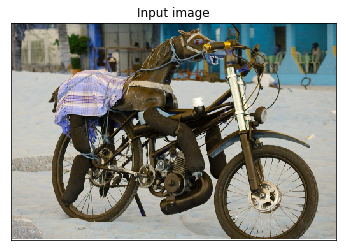

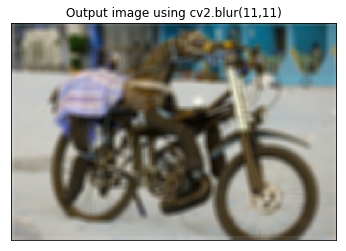

In [2]:
"""
	blur-image.py

	add a description of your code here

	author: add your fullname
	date created: add this info
	universidad de monterrey
"""

# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# read image
img_name = 'Figs/cavalo-motorizado.jpg'
img = cv2.imread(img_name)

# verify that image `img` exist
if img is None:
	print('ERROR: image ', img_name, 'could not be read')
	exit()

# blur image using `cv2.blur()`
kernel_size = (11,11)
blurred_image = cv2.blur(img, kernel_size)

# plot input and blurred images
plt.figure(1)
plt.imshow(img)
plt.title('Input image')
plt.xticks([])
plt.yticks([])

plt.figure(2)
plt.imshow(blurred_image)
plt.title('Output image using cv2.blur(%i,%i)' % (kernel_size[0], kernel_size[1]))
plt.xticks([])
plt.yticks([])

plt.show()

- TO COMPLETE THIS SECTION...
Describe the input/arguments of the method cv2.blur().



###  d. Gaussian Blur
Besides the `cv2.blur()` method, the function `cv2.GaussianBlur()` can also be used for spatial filtering. The code below shows how to use this method. Copy, understand and run the code and report the output image.

Try the code using a kernel function of different sizes and report the output images. The Gaussian function used in the above code is based on the following equation:

   <img src="Figs/0.0.0.0.0.0.gif" width="200" alt="Combined Image" />

where sigma is the standard deviation. We assume that coordinates x and y are integers. To generate a 3 x 3 filter maks from this function, we sample it about its centre. Thus, gaussian. Recall that a 2D Gaussian function has a cell shape, and that standard deviation controls the tightness of the bell.


# CHANGEEEEEE THIIIIIIIIIIIS    
- `numpy.zeros_like(a, dtype=None, order='K', subok=True)`
    - Return an array of zeros with the same shape and type as a given array.
    - a:array_like - The shape and data-type of a define these same attributes of the returned array.
    - dtype:data-type (optional) - Overrides the data type of the result. 
    - order:{‘C’, ‘F’, ‘A’, or ‘K’} (optional) - Overrides the memory layout of the result. ‘C’ means C-order, ‘F’ means F-order, ‘A’ means ‘F’ if a is Fortran contiguous, ‘C’ otherwise. ‘K’ means match the layout of a as closely as possible.
    - subok:bool (optional) - If True, then the newly created array will use the sub-class type of ‘a’, otherwise it will be a base-class array. Defaults to True.
    - **returns** - ndarray - array of zero with the same shame and type as a.
    
- `matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)`
- `matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)[source]`
    - Get or set the current tick locations and labels of the x-axis.
    - ticks:array_like - a list of positions at which ticks should be placed. You can pass an empty list to disable xticks.
    - labels:array_like (optional) - a list of explicit labels to place at the given locs.
    - **returns**: locs - an array of label locations
    - **returns**: labels - a list of text objects


Información obtenida de:
- https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=sobel#cv2.Sobel
- https://www.numpy.org/devdocs/user/basics.types.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

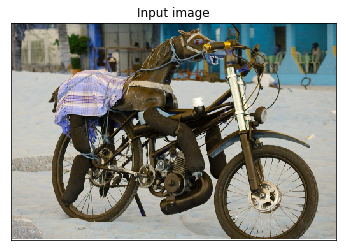

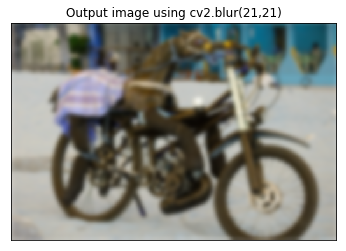

In [3]:
"""
	gaussian-blur-image.py

	add a description of your code here

	author: add your fullname
	date created: add this info
	universidad de monterrey
"""

# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# read image
img_name = 'Figs/cavalo-motorizado.jpg'
img = cv2.imread(img_name)

# verify that image `img` exist
if img is None:
	print('ERROR: image ', img_name, 'could not be read')
	exit()

# blur image using `cv2.blur()`
kernel_size = (21,21)
blurred_image = cv2.GaussianBlur(img, kernel_size, 0)

# plot input and blurred images
plt.figure(1)
plt.imshow(img)
plt.title('Input image')
plt.xticks([])
plt.yticks([])

plt.figure(2)
plt.imshow(blurred_image)
plt.title('Output image using cv2.blur(%i,%i)' % (kernel_size[0], kernel_size[1]))
plt.xticks([])
plt.yticks([])

plt.show()

- TO COMPLETE THIS SECTION...
Describe the input/arguments of the method `cv2.GaussianBlur()`.

###  e. Median Blur
A highly useful method for noise removal is that of `cv2.medianBlur()`. The code below first simulate salt & pepper noise and then use the `cv2.medianBlur()` filter to remove that noise added to the input image. Copy, understand and run this code and report the output image.



# CHANGEEEEEE THIIIIIIIIIIIS    
- `numpy.zeros_like(a, dtype=None, order='K', subok=True)`
    - Return an array of zeros with the same shape and type as a given array.
    - a:array_like - The shape and data-type of a define these same attributes of the returned array.
    - dtype:data-type (optional) - Overrides the data type of the result. 
    - order:{‘C’, ‘F’, ‘A’, or ‘K’} (optional) - Overrides the memory layout of the result. ‘C’ means C-order, ‘F’ means F-order, ‘A’ means ‘F’ if a is Fortran contiguous, ‘C’ otherwise. ‘K’ means match the layout of a as closely as possible.
    - subok:bool (optional) - If True, then the newly created array will use the sub-class type of ‘a’, otherwise it will be a base-class array. Defaults to True.
    - **returns** - ndarray - array of zero with the same shame and type as a.
    
- `matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)`
- `matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)[source]`
    - Get or set the current tick locations and labels of the x-axis.
    - ticks:array_like - a list of positions at which ticks should be placed. You can pass an empty list to disable xticks.
    - labels:array_like (optional) - a list of explicit labels to place at the given locs.
    - **returns**: locs - an array of label locations
    - **returns**: labels - a list of text objects


Información obtenida de:
- https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=sobel#cv2.Sobel
- https://www.numpy.org/devdocs/user/basics.types.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

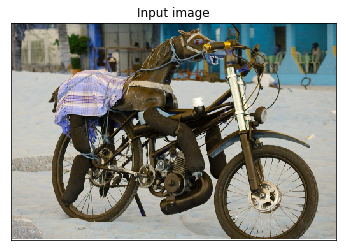

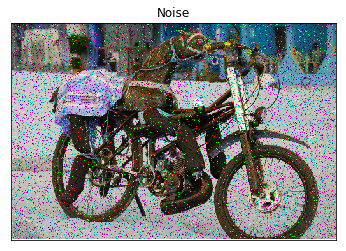

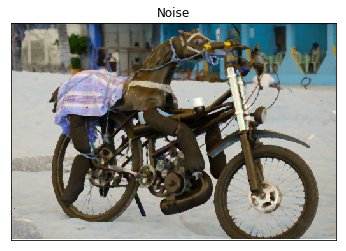

In [4]:
"""
	median-filter-for-noise-removal.py

	add a description of your code here

	author: add your fullname
	date created: add this info
	universidad de monterrey
"""

# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# read image
img_name = 'Figs/cavalo-motorizado.jpg'
img = cv2.imread(img_name)

# verify that image `img` exist
if img is None:
	print('ERROR: image ', img_name, 'could not be read')
	exit()

# define level of salt & pepper noise
s_vs_p = 0.2								
amount = 0.07								# <--- change this value

# create a copy of input image
out = img.copy()

# Generate Salt '1' noise
num_salt = np.ceil(amount * img.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
out[coords] = 255

# Generate Pepper '0' noise
num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
out[coords] = 0

# apply cv2.medianBlur() for noise removal
ksize = 3									# <--- change this value
img_median = cv2.medianBlur(out, ksize)

# plot input and blurred images
plt.figure(1)
plt.imshow(img)
plt.title('Input image')
plt.xticks([])
plt.yticks([])

plt.figure(2)
plt.imshow(out)
plt.title('Noise')
plt.xticks([])
plt.yticks([])

plt.figure(3)
plt.imshow(img_median)
plt.title('Noise')
plt.xticks([])
plt.yticks([])

plt.show()

- TO COMPLETE THIS SECTION...
Modify the parameters `amount` and `ksize` and report the effect of varying these parameters. Also, investigate about the Bilateral filter, which is effective in noise removal while keeping edges sharp.

### Conclusions


_Yo declaro, que he realizado este Laboratorio 5 con integridad académica_